In [0]:
import numpy as np
import pandas as pd
import random
import matplotlib.cm as cm
import scipy.cluster.hierarchy as hier

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy import misc
from matplotlib import pylab as plt
from sklearn.cluster import KMeans
from sklearn.manifold import MDS
from sklearn.metrics.pairwise import euclidean_distances

In [3]:
#Download data locally from https://github.com/cornelltech/cs5785-fall-2019/blob/master/data/hw3/mds-population.npz
data = np.load("mds-population.npz")
print(data['D'])
print(data['population_list'])

[[  0.  87.  12. ... 462. 559. 553.]
 [ 87.   0.  87. ... 210. 359. 285.]
 [ 12.  87.   0. ... 317. 401. 377.]
 ...
 [462. 210. 317. ...   0. 226. 173.]
 [559. 359. 401. ... 226.   0. 127.]
 [553. 285. 377. ... 173. 127.   0.]]
[b'Bantu' b'E. Afncan' b'Nilo-Saharan' b'W. African' b'San' b'Barter'
 b'Mbuti' b'Indian' b'Iranian' b'Near Eastern' b'Uralic' b'Ainu'
 b'Japanese' b'Korean' b'Mon Khmer' b'Thai' b'Dravidian' b'Mongol Tungus'
 b'Tibetan' b'Indonesian' b'Malaysian' b'Filipino' b'N. Turkic'
 b'S. Chinese' b'Basque' b'Lapp' b'Sardinian' b'Danish' b'English'
 b'Greek' b'Italian' b'C Amerind' b'Eskimo' b'Na-Dene' b'N. American'
 b'S. American' b'Chukchi' b'Melanesian' b'Micronesian' b'Polynesian'
 b'New Guinean' b'Australian']


#a)

/usr/local/lib/python3.6/dist-packages/sklearn/manifold/mds.py:421: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"
/usr/local/lib/python3.6/dist-packages/sklearn/manifold/mds.py:421: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"
/usr/local/lib/python3.6/dist-packages/sklearn/manifold/mds.py:421: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"
/usr/local/lib/python3.6/dist-packages/sklearn/manifold/mds.py:421: UserWarn

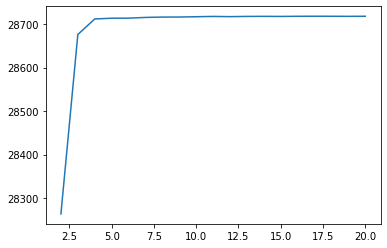

In [4]:
loss_lst = list()

for component in range (2, 21):
    two_d_embedding = MDS(n_components = component)
    data_transform = two_d_embedding.fit_transform(data['D'])
    distances = euclidean_distances(data_transform, data_transform)
    loss_lst.append(np.linalg.norm(data['D'] - distances))

fig, ax = plt.subplots()
plt.plot(range(2,21), loss_lst)
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/manifold/mds.py:421: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


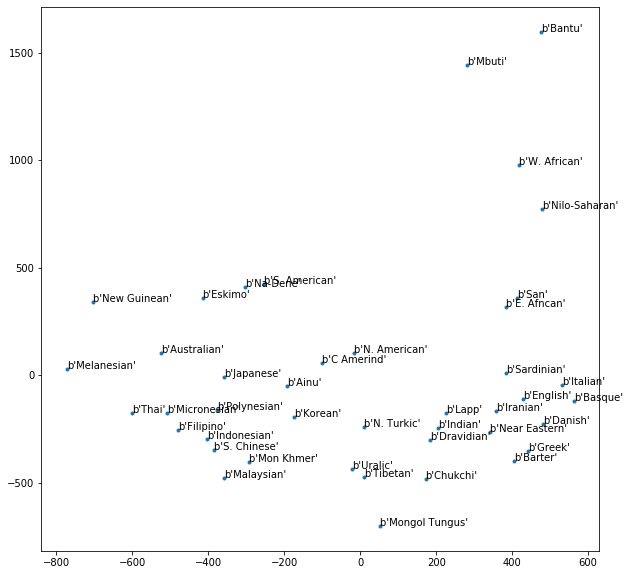

In [14]:
two_d_embedding = MDS(n_components = 2)
data_transform = two_d_embedding.fit_transform(data['D'])
fig, ax = plt.subplots()

fig.set_size_inches(10, 10)
plt.plot(data_transform[:,0], data_transform[:,1], '.')
for i, txt in enumerate (data['population_list']):
    ax.annotate(txt, (data_transform[:,0][i], data_transform[:,1][i]))

plt.show()

#b)

/usr/local/lib/python3.6/dist-packages/sklearn/manifold/mds.py:421: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


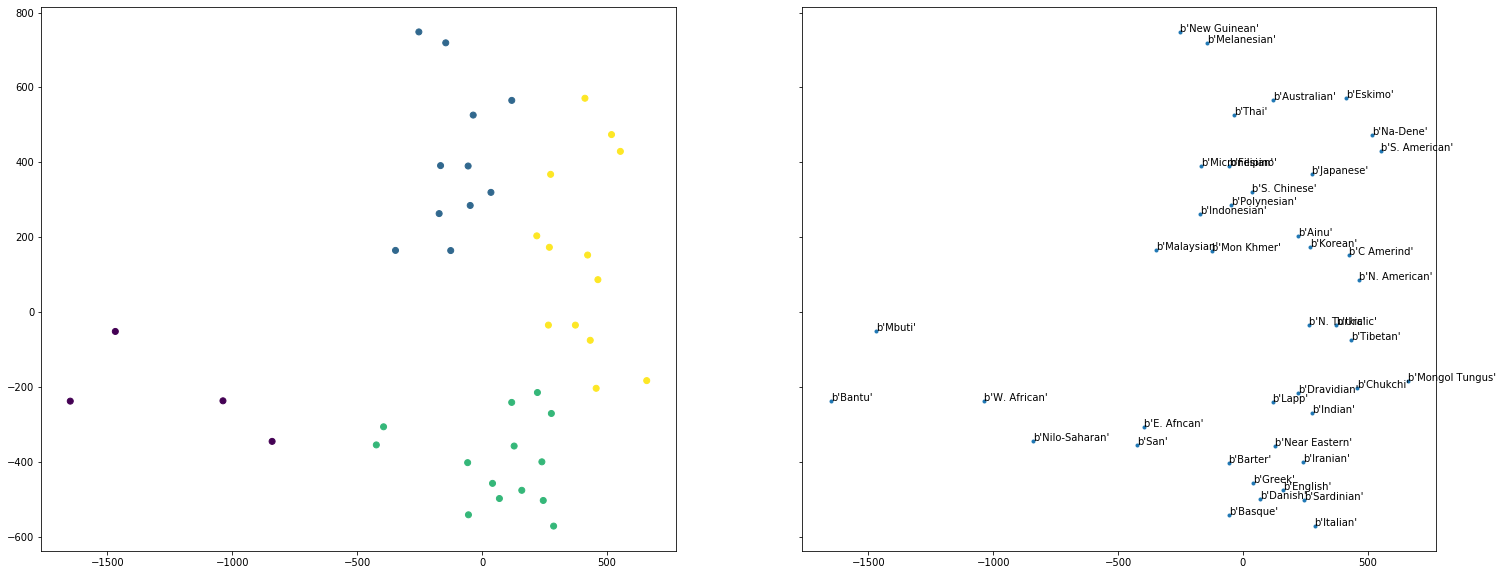

In [19]:
two_d_embedding = MDS(n_components = 2)
data_transform = two_d_embedding.fit_transform(data['D'])
k_means = KMeans(n_clusters = 4, random_state=0)
labels = k_means.fit_predict(data_transform)

fig, (ax1, ax2) = plt.subplots(1, 2, sharex='col', sharey='row')
fig.set_size_inches(25, 10)
ax1.scatter(data_transform[:,0], data_transform[:,1], c=labels, cmap='viridis')
ax2.plot(data_transform[:,0], data_transform[:,1], '.')
for i, txt in enumerate (data['population_list']):
    ax2.annotate(txt, (data_transform[:,0][i], data_transform[:,1][i]))
plt.show()

#c)

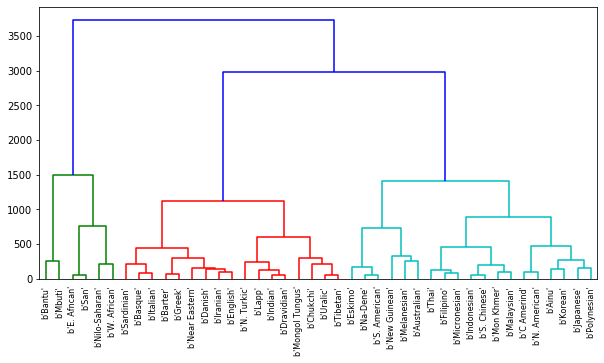

In [6]:
plt.figure(figsize=(10, 5))
dend = hier.dendrogram(hier.linkage(data_transform, method='ward'), labels=data['population_list'])

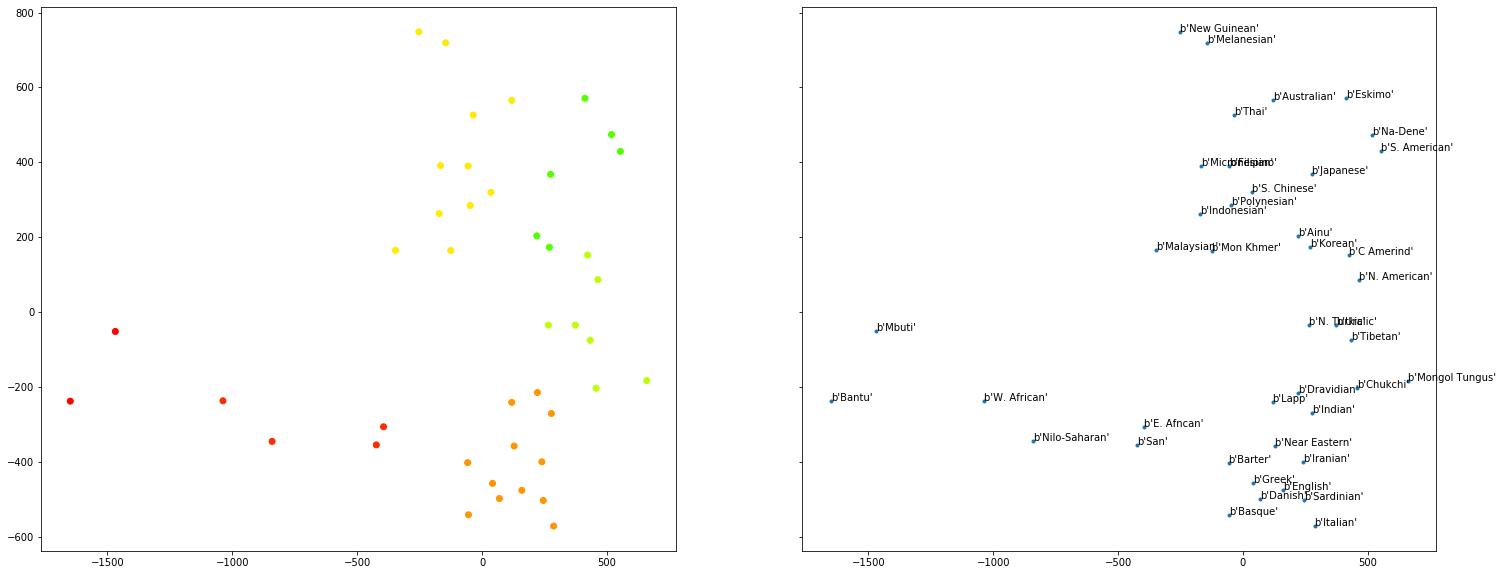

In [25]:
distance = 1000
clusters = fcluster(hier.linkage(data_transform, method='ward'), distance, criterion="distance")
fig, (ax1, ax2) = plt.subplots(1, 2, sharex='col', sharey='row')
fig.set_size_inches(25, 10)
ax1.scatter(data_transform[:,0], data_transform[:,1], c=clusters, cmap='prism')  # plot points with cluster dependent colors
ax2.plot(data_transform[:,0], data_transform[:,1],'.')
for i, txt in enumerate (data['population_list']):
    ax2.annotate(txt, (data_transform[:,0][i], data_transform[:,1][i]))
plt.show()

#d)

In [0]:
#Code implementation courtesy of https://github.com/salspaugh/machine_learning/blob/master/clustering/kmedoids.py
def kmedoids(distances, k):
    m = distances.shape[0] # number of points

    # Pick k random medoids.
    curr_medoids = np.array([-1]*k)
    while not len(np.unique(curr_medoids)) == k:
        curr_medoids = np.array([random.randint(0, m - 1) for _ in range(k)])
    old_medoids = np.array([-1] * k)
    new_medoids = np.array([-1] * k)
   
    # Until the medoids stop updating, do the following:
    while not ((old_medoids == curr_medoids).all()):
        # Assign each point to cluster with closest medoid.
        clusters = assign_points_to_clusters(curr_medoids, distances)

        # Update cluster medoids to be lowest cost point.
        for curr_medoid in curr_medoids:
            cluster = np.where(clusters == curr_medoid)[0]
            new_medoids[curr_medoids == curr_medoid] = compute_new_medoid(cluster, distances)

        old_medoids[:] = curr_medoids[:]
        curr_medoids[:] = new_medoids[:]

    return clusters, curr_medoids

In [0]:
def assign_points_to_clusters(medoids, distances):
    distances_to_medoids = distances[:, medoids]
    clusters = medoids[np.argmin(distances_to_medoids, axis=1)]
    clusters[medoids] = medoids
    return clusters

In [0]:
def compute_new_medoid(cluster, distances):
    mask = np.ones(distances.shape)
    mask[np.ix_(cluster,cluster)] = 0.
    cluster_distances = np.ma.masked_array(data=distances, mask=mask, fill_value=10e9)
    costs = cluster_distances.sum(axis=1)
    return costs.argmin(axis=0, fill_value=10e9)

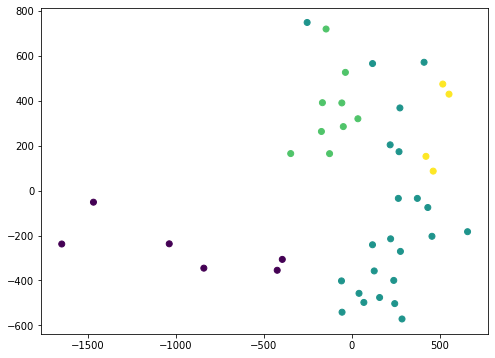

In [29]:
medoid_labels, medoids = kmedoids(data['D'], 4)
fig, ax = plt.subplots()
fig.set_size_inches(8, 6)
ax.scatter(data_transform[:,0], data_transform[:, 1], c=medoid_labels, cmap='viridis', zorder=2)
plt.show()